# 1. Importing Data and Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [23]:
path = r'C:\Users\facun\Desktop\Data Analysis\CF\Data Immersion\Achievement 6\Data Sets'

In [26]:
gun_violence_df = pd.read_csv(os.path.join(path, 'Prepared', 'new_dataset.csv'), index_col = False)

In [27]:
country_geo = r'C:\Users\facun\Desktop\Data Analysis\CF\Data Immersion\Achievement 6\Data Sets\Original/us-states.json'

In [28]:
country_geo

'C:\\Users\\facun\\Desktop\\Data Analysis\\CF\\Data Immersion\\Achievement 6\\Data Sets\\Original/us-states.json'

In [41]:
# Checking at the JSON file contents:

f = open(r'C:\Users\facun\Desktop\Data Analysis\CF\Data Immersion\Achievement 6\Data Sets\Original/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

# 2. Data Wrangling

In [29]:
gun_violence_df

,Unnamed: 0,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,...,victim_0-17,victim_18-30,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+
0,0,461105,2013,1,1,Tuesday,Pennsylvania,Mckeesport,NaN,0,...,0,1,0,0,0,0,0,0,0,0
1,1,460726,2013,1,1,Tuesday,California,Hawthorne,NaN,1,...,0,1,0,0,0,0,0,0,0,0
2,2,478855,2013,1,1,Tuesday,Ohio,Lorain,2.0,1,...,0,0,3,0,0,0,1,1,0,0
3,3,478925,2013,1,5,Saturday,Colorado,Aurora,NaN,4,...,0,1,1,1,0,0,0,1,0,0
4,4,478959,2013,1,7,Monday,North Carolina,Greensboro,2.0,2,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,239672,1083142,2018,3,31,Saturday,Louisiana,Rayne,1.0,0,...,0,0,0,0,0,0,1,0,0,0
239673,239673,1083139,2018,3,31,Saturday,Louisiana,Natchitoches,1.0,1,...,0,1,0,0,0,0,0,0,0,0
239674,239674,1083151,2018,3,31,Saturday,Louisiana,Gretna,1.0,0,...,0,1,0,0,0,0,0,0,0,0
239675,239675,1082514,2018,3,31,Saturday,Texas,Houston,1.0,1,...,0,0,1,0,0,0,0,0,0,0


In [30]:
gun_violence_df.shape

(239677, 27)

In [31]:
gun_violence_df.columns

Index(['Unnamed: 0', 'incident_id', 'year', 'month', 'day', 'day_of_week',
       'state', 'city_or_county', 'n_guns_involved', 'n_killed', 'n_injured',
       'victim_count', 'suspect_count', 'male_victims_count',
       'female_victims_count', 'male_suspects_count', 'female_suspects_count',
       'victim_0-17', 'victim_18-30', 'victim_31-45', 'victim_46-60',
       'victim_61+', 'suspect_0-17', 'suspect_18-30', 'suspect_31-45',
       'suspect_46-60', 'suspect_61+'],
      dtype='object')

In [32]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             239677 non-null  int64  
 1   incident_id            239677 non-null  int64  
 2   year                   239677 non-null  int64  
 3   month                  239677 non-null  int64  
 4   day                    239677 non-null  int64  
 5   day_of_week            239677 non-null  object 
 6   state                  239677 non-null  object 
 7   city_or_county         239677 non-null  object 
 8   n_guns_involved        140226 non-null  float64
 9   n_killed               239677 non-null  int64  
 10  n_injured              239677 non-null  int64  
 11  victim_count           239677 non-null  int64  
 12  suspect_count          239677 non-null  int64  
 13  male_victims_count     239677 non-null  int64  
 14  female_victims_count   239677 non-nu

In [33]:
gun_violence_df.dtypes

Unnamed: 0                 int64
incident_id                int64
year                       int64
month                      int64
day                        int64
day_of_week               object
state                     object
city_or_county            object
n_guns_involved          float64
n_killed                   int64
n_injured                  int64
victim_count               int64
suspect_count              int64
male_victims_count         int64
female_victims_count       int64
male_suspects_count        int64
female_suspects_count      int64
victim_0-17                int64
victim_18-30               int64
victim_31-45               int64
victim_46-60               int64
victim_61+                 int64
suspect_0-17               int64
suspect_18-30              int64
suspect_31-45              int64
suspect_46-60              int64
suspect_61+                int64
dtype: object

In [34]:
gun_violence_df.isna().sum()

Unnamed: 0                   0
incident_id                  0
year                         0
month                        0
day                          0
day_of_week                  0
state                        0
city_or_county               0
n_guns_involved          99451
n_killed                     0
n_injured                    0
victim_count                 0
suspect_count                0
male_victims_count           0
female_victims_count         0
male_suspects_count          0
female_suspects_count        0
victim_0-17                  0
victim_18-30                 0
victim_31-45                 0
victim_46-60                 0
victim_61+                   0
suspect_0-17                 0
suspect_18-30                0
suspect_31-45                0
suspect_46-60                0
suspect_61+                  0
dtype: int64

In [36]:
#Deleted unnecessary columns
gun_violence_df = gun_violence_df.drop(columns=['Unnamed: 0'])

In [37]:
#Checked for duplicates
gun_violence_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
239672    False
239673    False
239674    False
239675    False
239676    False
Length: 239677, dtype: bool

# 3. Checking for extreme values

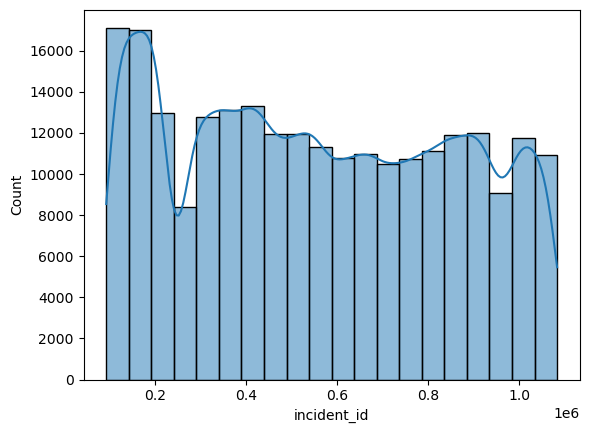

In [38]:
#Created a histogram for extreme values for incident_id
hist_price = sns.histplot(gun_violence_df['incident_id'], bins = 20, kde = True)


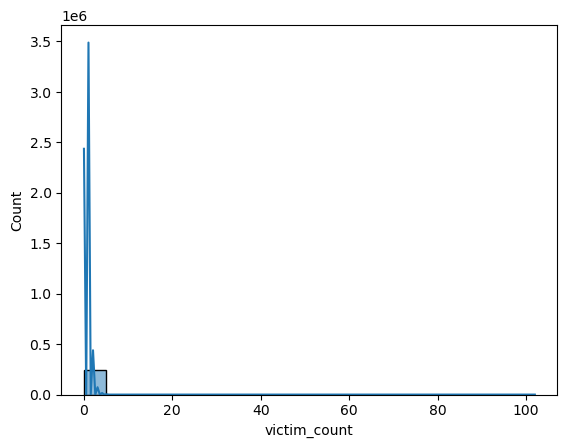

In [39]:
#Created a histogram for extreme values for victim_count
hist_price = sns.histplot(gun_violence_df['victim_count'], bins = 20, kde = True)

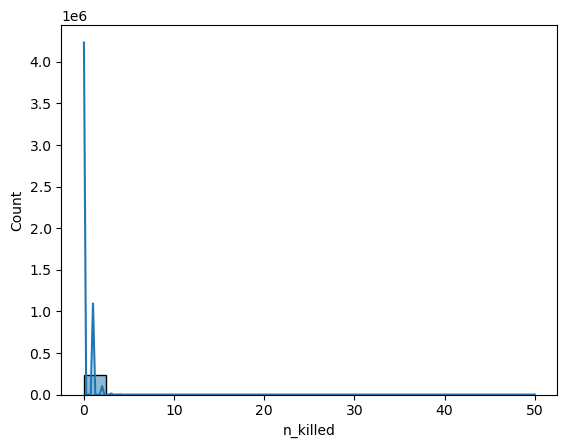

In [40]:
#Created a histogram for extreme values for n_killed
hist_price = sns.histplot(gun_violence_df['n_killed'], bins = 20, kde = True)

# 4. Plotting a Choropleth

In [43]:
# Creating a data frame with just the states and the values for n_killed

n_killed_per_state = gun_violence_df[['state','n_killed']]
n_killed_per_state.head()

,state,n_killed
0,Pennsylvania,0
1,California,1
2,Ohio,1
3,Colorado,4
4,North Carolina,2


In [71]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_killed_per_state,
    columns = ['state', 'n_killed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of killed participants per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [72]:
# Save the map as an HTML file
map.save('n_killed_state_interactive_map.html')

In [45]:
# Creating a data frame with just the states and the values for n_killed

n_injured_per_state = gun_violence_df[['state','n_injured']]
n_injured_per_state.head()

,state,n_injured
0,Pennsylvania,4
1,California,3
2,Ohio,3
3,Colorado,0
4,North Carolina,2


In [68]:
n_injured_per_state

,state,n_injured
0,Pennsylvania,4
1,California,3
2,Ohio,3
3,Colorado,0
4,North Carolina,2
...,...,...
239672,Louisiana,0
239673,Louisiana,0
239674,Louisiana,1
239675,Texas,0


In [67]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_injured_per_state,
    columns = ['state', 'n_injured'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Injured participants per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [73]:
# Save the map as an HTML file
map.save('n_injured_state_interactive_map.html')

In [48]:
# Creating a data frame with just the states and the values for n_killed

n_female_victims_per_state = gun_violence_df[['state','female_victims_count']]
n_female_victims_per_state.head()

,state,female_victims_count
0,Pennsylvania,1
1,California,0
2,Ohio,0
3,Colorado,1
4,North Carolina,1


In [64]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_female_victims_per_state,
    columns = ['state', 'female_victims_count'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Female victims per State").add_to(map)
folium.LayerControl().add_to(map)

map

In [55]:
# Count incidents per state
incident_counts = gun_violence_df.groupby('state')['incident_id'].count()

In [56]:
incident_counts

state
Alabama                  5471
Alaska                   1349
Arizona                  2328
Arkansas                 2842
California              16306
Colorado                 3201
Connecticut              3067
Delaware                 1685
District of Columbia     3195
Florida                 15029
Georgia                  8925
Hawaii                    289
Idaho                     661
Illinois                17556
Indiana                  5852
Iowa                     2517
Kansas                   2145
Kentucky                 4157
Louisiana                8103
Maine                     907
Maryland                 5798
Massachusetts            5981
Michigan                 6136
Minnesota                2408
Mississippi              3599
Missouri                 6631
Montana                   638
Nebraska                 1651
Nevada                   1952
New Hampshire             964
New Jersey               5387
New Mexico               1645
New York                 9712
Nort

In [60]:
incidents_per_state = gun_violence_df.groupby('state')['incident_id'].nunique().reset_index(name='incident_count')

In [66]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Add the choropleth layer
folium.Choropleth(
    geo_data= country_geo,
    data=incidents_per_state,
    columns=['state', 'incident_count'],  # Adjust these column names based on your DataFrame
    key_on='feature.properties.name',  # Adjust based on your GeoJSON file
    fill_color='YlOrBr', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Number of Incidents per State').add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map


In [74]:
# Save the map as an HTML file
map.save('incident_count_state_interactive_map.html')